# **Project Overview**
In growing fast of brand skincare in the world, many skincare's consumer often struggles to find similar product based in their preferences. The use of Artificial Intellegence (AI) for cosmetic brands to help consumers find their suitable products become future trends nowadays [(Lin et al., 2022)](https://doi.org/10.3390/electronics11010143). Conten-based filtering of recommender system is one of the most useful techniques to find similarity between products. This system leverages machine learning and natural language processing (NLP) to analyze skincare product descriptions, ratings, and user reviews to generate personalized recommendations [(Vinutha et al, 2024)](https://ieeexplore.ieee.org/document/10626458).


***

# **Business Understanding**
## **Problem Statements**
1. What are best skincare products based on rating given by consumers?
2. How to build content-based recommender system to help users find top 5 skincare product that similar with their preferences?
3. What are the best similarity metrics for comparing skincare products?

## **Goals**
1. Find best skincare product based on rating given by consumers on the website.
2. Get top 5 skincare recommendation products to users.
3. Investigate what best similarity metrics based on their performance metrics.

## **Solution Statements**
1. Use mutlivariate analysis EDA on rating and skincare product (type, name, and brand).
2. Develop content-based recommender system suggests products based on their attributes (type, brand, name, and rating) and recommend top best 5 product according to similarity.
3. Compare two different similarity metrics (cosine similarity and jaccard distance) and find the best based on their performance metrics (MAP, MRR, precision, and recall).

***


# **Data Understanding**
The [dataset](https://www.kaggle.com/datasets/prastyasusanto/indonesia-skincare-from-female-daily-reviews) containing skincare information obtained from femaledaily.com. The data was collected using web scraping with the BeautifulSoup library in Python that has been collected by Prastya Susanto, Rimba Erlangga, and Rama Wijaya and posted on Kaggle.

## **Variables**
- **Type** : type of skincare product.
- **Name** : name of skincare product.
- **Brand** : brand name of skincare product in Indonesia
- **Rating** : rating given by consumers. The range of value is from 1.0 to 5.0.
- **Total Reviewers** : number of consumer that reviewes the product in website.
- **Link** : link to the website.


In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import label_ranking_average_precision_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP/advanced machine learning dicoding/skincare.csv')

In [4]:
df

,Type,Name,Brand,Rating,Total Reviewers,Link
0,Sunscreen,Sun Protection SPF 30 PA+++,Emina,3.6,"13,700",https://reviews.femaledaily.com/products/moist...
1,Sunscreen,Hydrasoothe Sunscreen Gel SPF 45+++,Azarine Cosmetics,4.1,"9,441",https://reviews.femaledaily.com/products/moist...
2,Sunscreen,UV Moisture Milk,Skin Aqua,4.2,"8,947",https://reviews.femaledaily.com/products/moist...
3,Sunscreen,UV Shield Essential Sunscreen Gel SPF 35 PA +++,Wardah,3.3,"8,358",https://reviews.femaledaily.com/products/moist...
4,Sunscreen,UV Aqua Rich Watery Essence SPF 50+/PA++++,Biore,4.2,"7,362",https://reviews.femaledaily.com/products/moist...
...,...,...,...,...,...,...
7427,Make Up Removal,Blueberry Micellar 5.5 Lip&Eye Remover Pad,Frudia,5.0,1,https://reviews.femaledaily.com/products/clean...
7428,Make Up Removal,Waterproof Eye Make-Up Remover,Evoluderm,5.0,1,https://reviews.femaledaily.com/products/clean...
7429,Make Up Removal,Come Clean Eye & Lip Make-up Remover,dUCk Cosmetics,4.0,1,https://reviews.femaledaily.com/products/clean...
7430,Make Up Removal,Point Make Up Off,Lunasol,5.0,1,https://reviews.femaledaily.com/products/clean...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432 entries, 0 to 7431
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             7432 non-null   object 
 1   Name             7432 non-null   object 
 2   Brand            7432 non-null   object 
 3   Rating           7432 non-null   float64
 4   Total Reviewers  7432 non-null   object 
 5   Link             7432 non-null   object 
dtypes: float64(1), object(5)
memory usage: 348.5+ KB


There are 7432 rows and 6 column contain object(5) and float(1) data types.

**Total Reviewers** dtypes must be an integer.

In [35]:
df['Total Reviewers']=df['Total Reviewers'].str.replace(',', '').astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432 entries, 0 to 7431
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             7432 non-null   object 
 1   Name             7432 non-null   object 
 2   Brand            7432 non-null   object 
 3   Rating           7432 non-null   float64
 4   Total Reviewers  7432 non-null   int64  
 5   Link             7432 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 348.5+ KB


## **Check Missing Values**

In [6]:
df.isnull().sum()

,0
Type,0
Name,0
Brand,0
Rating,0
Total Reviewers,0
Link,0


There's no missing values.

## **Check Duplicated Data**

In [7]:
df.duplicated().sum()

2

In [8]:
duplicated = df[df.duplicated(keep=False)]
duplicated

,Type,Name,Brand,Rating,Total Reviewers,Link
6906,Make Up Removal,Naturals Micellar Water,Safi,4.3,42,https://reviews.femaledaily.com/products/clean...
6907,Make Up Removal,Naturals Micellar Water,Safi,4.3,42,https://reviews.femaledaily.com/products/clean...
7076,Make Up Removal,Invigorating Wet Tissues,Watsons,4.6,5,https://reviews.femaledaily.com/products/clean...
7089,Make Up Removal,Invigorating Wet Tissues,Watsons,4.6,5,https://reviews.femaledaily.com/products/clean...


There are two duplicated data.

## **Check Outlier**

The only column that might have outlier is **Rating**.

In [9]:
palette = sns.color_palette('flare', n_colors=5)
palette

[(0.91262605, 0.52893336, 0.40749715),
 (0.87199254, 0.3633634, 0.35974223),
 (0.75861834, 0.25356035, 0.40663694),
 (0.60407977, 0.21017746, 0.43913439),
 (0.44584668, 0.17360625, 0.43114133)]

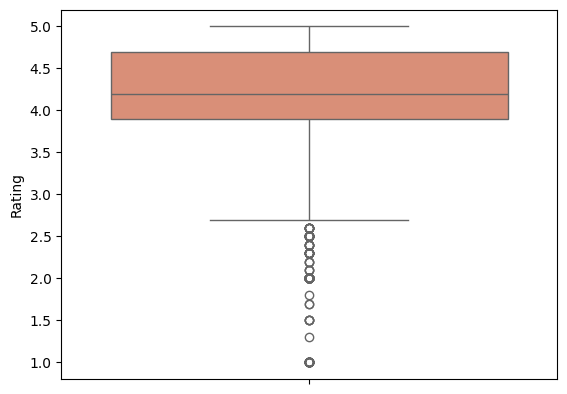

In [10]:
sns.boxplot(df['Rating'], color=palette[0])
plt.show()

There are some outliers with value below 2.5.

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [26]:
(df['Brand'].value_counts())

,count
Brand,
Innisfree,134
Oriflame,98
Nature Republic,90
Etude House,88
The Body Shop,80
...,...
pHisohex,1
FEALI,1
Skinmurch,1


There are 1204 brand name of skincare product. We make histogram plot of top 5 most counts brand name.

<ipython-input-117-224dc5dddff2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette=palette)
<ipython-input-117-224dc5dddff2>:4: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_brands.index, y=top_brands.values, palette=palette)


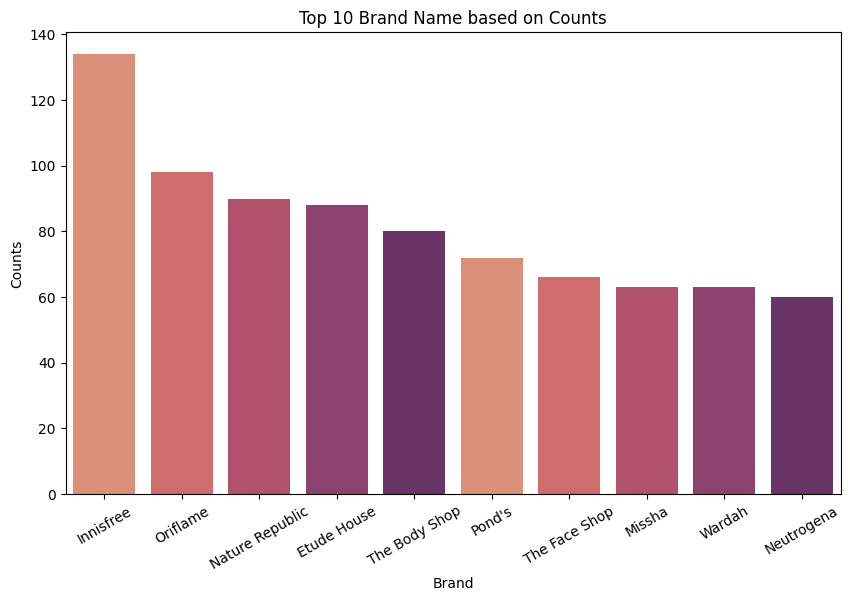

In [117]:
if 'Brand' in df.columns:
    top_brands = df['Brand'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_brands.index, y=top_brands.values, palette=palette)
    plt.xticks(rotation=30)
    plt.title('Top 10 Brand Name based on Counts')
    plt.ylabel('Counts')
    plt.xlabel('Brand')

The most counts skincare brand is Innisfree with 134 counts.

<ipython-input-118-9f392ea2b640>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='Type', palette=palette)
<ipython-input-118-9f392ea2b640>:2: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(df, x='Type', palette=palette)


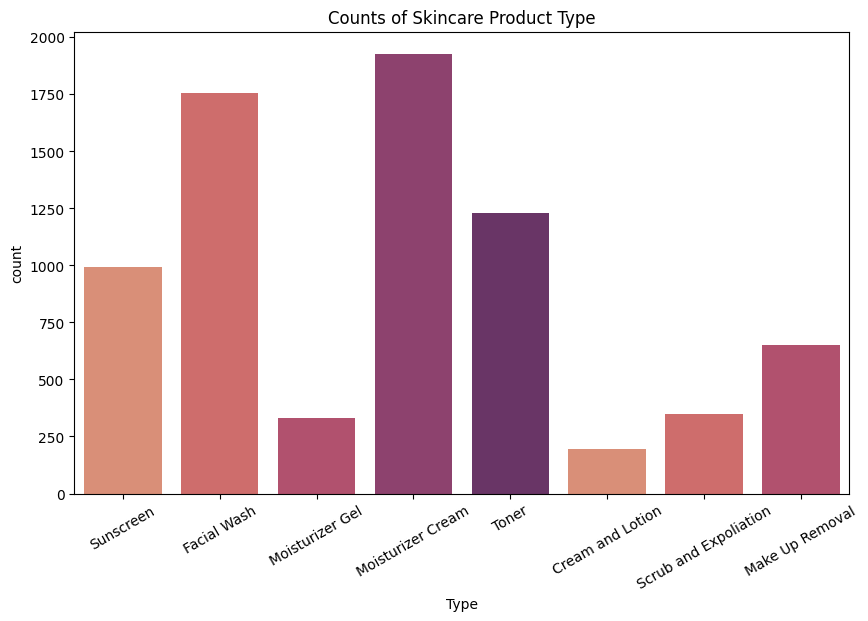

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Type', palette=palette)
plt.xticks(rotation=30)
plt.title('Counts of Skincare Product Type')
plt.show()

There are 6 types of skincare product, **moisturizer cream** is the most counts skincare product type.

### **Multivariate Analysis**

In [108]:
#most reviewed skincare type
type_reviews = df.groupby('Type')['Total Reviewers'].sum().reset_index()
type_reviews

,Type,Total Reviewers
0,Cream and Lotion,13091
1,Facial Wash,145387
2,Make Up Removal,77567
3,Moisturizer Cream,88883
4,Moisturizer Gel,21897
5,Scrub and Expoliation,31166
6,Sunscreen,103973
7,Toner,116927


<ipython-input-109-ed53324f0626>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Total Reviewers', data=type_reviews, palette=palette)
<ipython-input-109-ed53324f0626>:2: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Type', y='Total Reviewers', data=type_reviews, palette=palette)


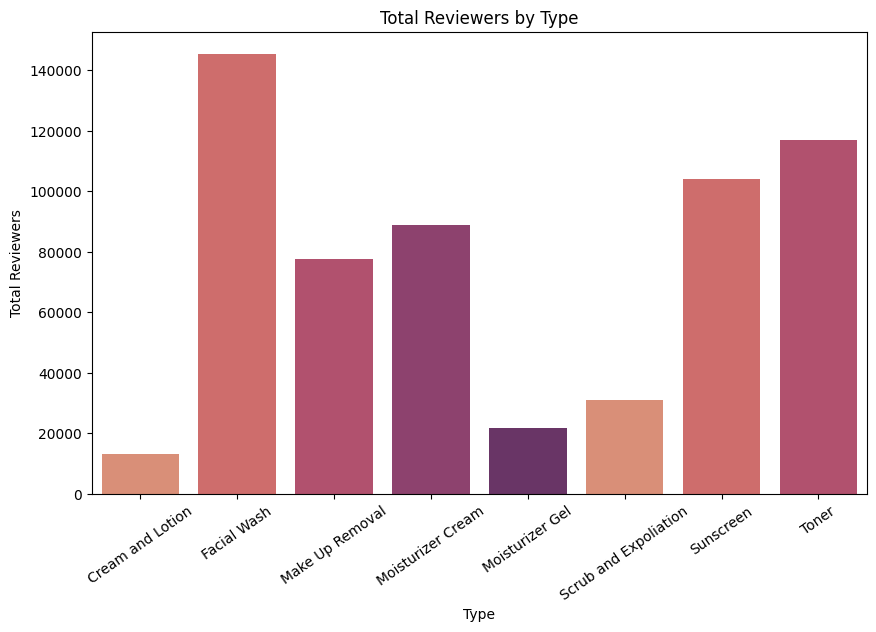

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Total Reviewers', data=type_reviews, palette=palette)
plt.xticks(rotation=35)
plt.title('Total Reviewers by Type')
plt.show()

The most reviewed skincare type product is **Facial Wash** with more than 140.000 reviewers on the website.

In [110]:
#most reviewed skincare type
brand_reviews = df.groupby('Brand')['Total Reviewers'].sum().reset_index()
top10_brand_reviews = brand_reviews.sort_values(by='Total Reviewers',ascending=False).head(10) #select top 10 most reviewed

<ipython-input-112-c2a7c6422d4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Total Reviewers', data=top10_brand_reviews, palette=palette)
<ipython-input-112-c2a7c6422d4a>:2: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Brand', y='Total Reviewers', data=top10_brand_reviews, palette=palette)


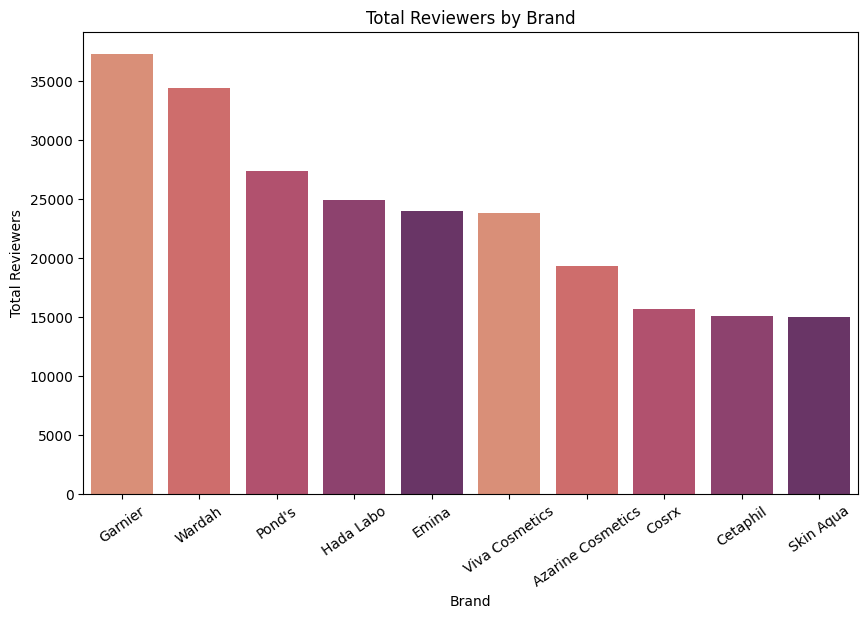

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Total Reviewers', data=top10_brand_reviews, palette=palette)
plt.xticks(rotation=35)
plt.title('Total Reviewers by Brand')
plt.show()

Top 10 the most reviewed skincare brand name is **Garnier, Wardah, Pond's, Hada Labo, Emina, Viva Cosmetics, Azarine Cosmetics, Cosrx, Cetaphil,** and **Skin Aqua**.

<ipython-input-114-b0807f420781>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Type', y='Rating', data=type_rating, palette=palette)
<ipython-input-114-b0807f420781>:7: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Type', y='Rating', data=type_rating, palette=palette)


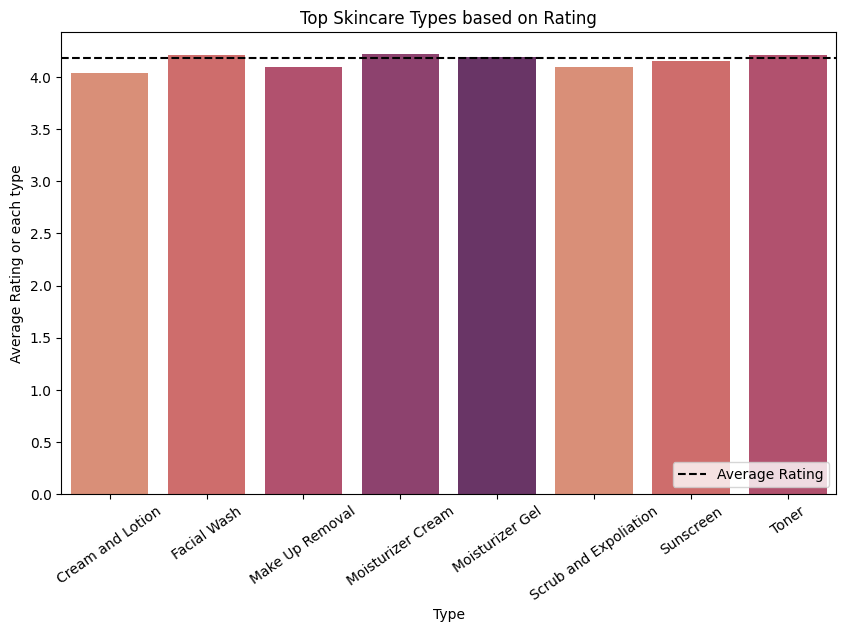

In [114]:
#top rating skincare types
type_rating = df.groupby('Type')['Rating'].mean().reset_index()
#calculate average rating
avg_rate = df['Rating'].mean()
#bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Type', y='Rating', data=type_rating, palette=palette)
ax.axhline(avg_rate, color='black', linestyle='--', label='Average Rating')
plt.legend(loc='lower right')
plt.ylabel('Average Rating or each type')
plt.title('Top Skincare Types based on Rating')
plt.xticks(rotation=35)
plt.show()

Skincare type with average rating above mean average rating of skincare type product are **Moisturizer Cream, Toner, Facial Wash,** and **Moisturizer Gel**.

In [115]:
#The most popular brand name and it's average rating

# Get the top 10 most frequent brand names
top_brands = df['Brand'].value_counts().head(10).index

# Create a DataFrame with average ratings for top brands
top_brand_ratings = df[df['Brand'].isin(top_brands)].groupby('Brand')['Rating'].agg(['mean', 'count'])
top_brand_ratings = top_brand_ratings.rename(columns={'mean': 'Average Rating', 'count': 'Number of Ratings'})
top_brand_ratings = top_brand_ratings.sort_values(by='Number of Ratings', ascending=False)  # Sort by average rating
top_brand_ratings = top_brand_ratings.reset_index() # Reset the index

In [162]:
top_brand_ratings

,Brand,Average Rating,Number of Ratings
0,Innisfree,4.111940,134
1,Oriflame,3.763265,98
2,Nature Republic,4.177778,90
3,Etude House,3.909091,88
4,The Body Shop,3.758750,80
5,Pond's,3.794444,72
6,The Face Shop,4.013636,66
7,Missha,4.439683,63
8,Wardah,3.726984,63
9,Neutrogena,3.971667,60


<ipython-input-116-52b4174bf476>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Brand', y='Average Rating', data=top_brand_ratings, palette=palette)
<ipython-input-116-52b4174bf476>:2: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Brand', y='Average Rating', data=top_brand_ratings, palette=palette)


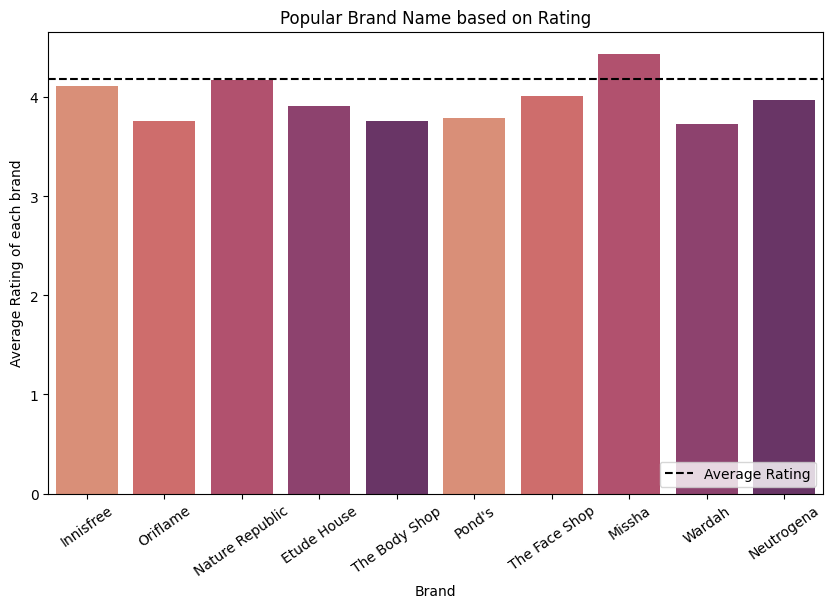

In [116]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Brand', y='Average Rating', data=top_brand_ratings, palette=palette)
ax.axhline(avg_rate, color='black', linestyle='--', label='Average Rating')
plt.legend(loc='lower right')
plt.ylabel('Average Rating of each brand')
plt.title('Popular Brand Name based on Rating')
plt.xticks(rotation=35)
plt.show()

Popular brand name with highest average rating is **Missha**.

# **Data Preparation**

## **Handling Duplicated Data**

Based on Data Understanding, there's 2 duplicated data. Drop two duplicated data.

In [119]:
df.drop_duplicates(inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7430 entries, 0 to 7431
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             7430 non-null   object 
 1   Name             7430 non-null   object 
 2   Brand            7430 non-null   object 
 3   Rating           7430 non-null   float64
 4   Total Reviewers  7430 non-null   int64  
 5   Link             7430 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 406.3+ KB


So, there's 7430 rows of data.

## **Handling Outlier**

There's some outlier on **Rating** feature with value below 2.5. Keep it because it might contains low rating skincare brand or type informations.

## **Feature Engineering**

In [127]:
# Combine relevant text columns into a single feature
df["Combined_Features"] = df["Type"] + " " + df["Name"] + " " + df["Brand"]

# Initialize TF-IDF Vectorizer (remove stop words and use unigrams & bigrams)
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))
tfidf_matrix = tfidf.fit_transform(df["Combined_Features"])

In [129]:
tfidf_matrix.shape

(7430, 22556)

Matrix with shape (7430, 22556) created successfully.

# **Model Development**

## **Cosine Similarity**

In [130]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Check the shape of the similarity matrix
cosine_sim.shape

(7430, 7430)

In [131]:
cosine_sim

array([[1.        , 0.06125608, 0.0218338 , ..., 0.        , 0.        ,
        0.        ],
       [0.06125608, 1.        , 0.03485063, ..., 0.02940832, 0.        ,
        0.        ],
       [0.0218338 , 0.03485063, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02940832, 0.        , ..., 1.        , 0.10364634,
        0.15752703],
       [0.        , 0.        , 0.        , ..., 0.10364634, 1.        ,
        0.07692457],
       [0.        , 0.        , 0.        , ..., 0.15752703, 0.07692457,
        1.        ]])

 It has a shape of (7432, 7432), meaning each product is compared with every other product.

Create recommendation function with input parameter **product name** and returs **top 5 most similar skincare products** based on cosine similarity.

In [150]:
product_indices = pd.Series(df.index, index=df["Name"]).drop_duplicates()

def recommend_skincare_cosine(product_name, top_n=5):
    """Given a product name, recommend similar skincare products."""
    if product_name not in product_indices:
        return f"Product '{product_name}' not found in the dataset."
    idx = product_indices[product_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1][0] if isinstance(x[1], np.ndarray) else x[1], reverse=True)[1:top_n+1] #sort products based on similarity
    product_recommendations = [df.iloc[i[0]][["Name", "Brand", "Type", "Rating"]] for i in sim_scores]
    return pd.DataFrame(product_recommendations)

# Test the recommender system with first product in dataset
sample_product = df["Name"].iloc[0]  # Sun Protection SPF 30 PA+++
recommend_skincare_cosine(sample_product)

,Name,Brand,Type,Rating
58,Skin Buddy Sun Protection SPF 30 PA+++,Emina,Sunscreen,3.9
19,Sun Battle SPF 30 PA +++,Emina,Sunscreen,3.7
201,Sun Protection SPF 15,Pond's,Sunscreen,3.7
840,Sun Protection Mineral Powder SPF 30,Derma E,Sunscreen,4.0
66,Sun Battle SPF 45 PA+++,Emina,Sunscreen,3.1


The system return 5 most similar products of **Sun Protection SPFF 30 PA+++**. All of products type is **Sunscreen** which has the same type of tested product. Now, test with another product name that didn't given in dataset.

## **Jaccard Distance**

In [154]:
from sklearn.metrics import jaccard_score
# Convert 'Type' and 'Brand' to One-Hot Encoding for Jaccard Distance Calculation
df_ohe = pd.get_dummies(df[["Type", "Brand"]])
def recommend_skincare_jaccard(product_name, top_n=5):
    """Compute Jaccard Similarity for a given product based on one-hot encoded features."""
    if product_name not in product_indices:
        return f"Product '{product_name}' not found."

    idx = product_indices[product_name]
    product_vector = df_ohe.iloc[idx].values
    # Compute Jaccard similarity for all products
    jaccard_scores = df_ohe.apply(lambda x: jaccard_score(product_vector, x.values), axis=1)
    top_indices = jaccard_scores.nlargest(top_n + 1).index[1:]
    recommendations = df.iloc[top_indices][["Name", "Brand", "Type", "Rating"]]

    return recommendations

# Test Jaccard Similarity for the first product in dataset
sample_product = df["Name"].iloc[0]  # Sun Protection SPF 30 PA+++
recommend_skincare_jaccard(sample_product)


,Name,Brand,Type,Rating
19,Sun Battle SPF 30 PA +++,Emina,Sunscreen,3.7
58,Skin Buddy Sun Protection SPF 30 PA+++,Emina,Sunscreen,3.9
66,Sun Battle SPF 45 PA+++,Emina,Sunscreen,3.1
1,Hydrasoothe Sunscreen Gel SPF 45+++,Azarine Cosmetics,Sunscreen,4.1
2,UV Moisture Milk,Skin Aqua,Sunscreen,4.2


# **Evaluation**

## **Comparison of top 5 recommendation between Cosine and Jaccard Similarity**

In [155]:
print('Cosine Similarity')
print('==============================================================================')
print(recommend_skincare_cosine(sample_product))
print('//////////////////////////////////////////////////////////////////////////////')
print('Jaccard Distance')
print('==============================================================================')
print(recommend_skincare_jaccard(sample_product))

Cosine Similarity
                                       Name    Brand       Type  Rating
58   Skin Buddy Sun Protection SPF 30 PA+++    Emina  Sunscreen     3.9
19                 Sun Battle SPF 30 PA +++    Emina  Sunscreen     3.7
201                   Sun Protection SPF 15   Pond's  Sunscreen     3.7
840    Sun Protection Mineral Powder SPF 30  Derma E  Sunscreen     4.0
66                  Sun Battle SPF 45 PA+++    Emina  Sunscreen     3.1
//////////////////////////////////////////////////////////////////////////////
Jaccard Distance
                                      Name              Brand       Type  \
19                Sun Battle SPF 30 PA +++              Emina  Sunscreen   
58  Skin Buddy Sun Protection SPF 30 PA+++              Emina  Sunscreen   
66                 Sun Battle SPF 45 PA+++              Emina  Sunscreen   
1      Hydrasoothe Sunscreen Gel SPF 45+++  Azarine Cosmetics  Sunscreen   
2                         UV Moisture Milk          Skin Aqua  Sunscreen  

Top 5 recommendation given by cosine and jaccard metrics is similar each other with the same type product (Sunscreen).

## **Comparison performance between Cosine and Jaccard**

In [158]:
# Function to compute Precision@K and Recall@K
def precision_recall_at_k(recommended_indices, true_indices, k):
    recommended_set = set(recommended_indices[:k])
    true_set = set(true_indices)
    intersection = recommended_set & true_set

    precision = len(intersection) / k
    recall = len(intersection) / len(true_set) if len(true_set) > 0 else 0

    return precision, recall

# Function to compute MAP@K and MRR@K
def map_mrr_at_k(recommended_indices, true_indices, k):
    ap_sum = 0
    rr_sum = 0
    num_relevant = 0

    for i, rec in enumerate(recommended_indices[:k]):
        if rec in true_indices:
            num_relevant += 1
            ap_sum += num_relevant / (i + 1)
            if rr_sum == 0:
                rr_sum = 1 / (i + 1)

    map_k = ap_sum / min(len(true_indices), k) if true_indices else 0
    mrr_k = rr_sum

    return map_k, mrr_k


In [161]:
true_indices = [19, 66, 684]  # Assuming these are the ground-truth relevant items
recommended_indices_jaccard = recommend_skincare_jaccard(sample_product).index.tolist()
recommended_indices_cosine = recommend_skincare_cosine(sample_product).index.tolist()
# Compute metrics
precision_k, recall_k = precision_recall_at_k(recommended_indices_jaccard, true_indices, k=5)
precision_k_cos, recall_k_cos = precision_recall_at_k(recommended_indices_cosine, true_indices, k=5)
map_k, mrr_k = map_mrr_at_k(recommended_indices_jaccard, true_indices, k=5)
map_k_cos, mrr_k_cos = map_mrr_at_k(recommended_indices_cosine, true_indices, k=5)
#create dataframe
data = {
    'Metrics': ['Precision@5', 'Recall@5', 'MAP@5', 'MRR@5'],
    'Jaccard': [precision_k, recall_k, map_k, mrr_k],
    'Cosine': [precision_k_cos, recall_k_cos, map_k_cos, mrr_k_cos]
}
df_metrics = pd.DataFrame(data)
df_metrics

,Metrics,Jaccard,Cosine
0,Precision@5,0.400000,0.400000
1,Recall@5,0.666667,0.666667
2,MAP@5,0.555556,0.300000
3,MRR@5,1.000000,0.500000


- Both models has same value for **Precision@5** and **Recall@5**. It means that both models recommend 40% relevant products in the top 5 results and retrieve 67% of all relevant products.
- Based on **MAP@5** score, Jaccard ranks relevant items better than Cosine.
- Based on **MRR@5** score, Jaccard finds the first relevant item faster than Cosine.

# **Conclusion**

- Best skincare product type based on mean average rating are **Moisturizer Cream, Toner, Facial Wash,** and **Moisturizer Gel** and best popular model based on average rating is **Missha** with 63 number of ratings and 4.439 average rating.
- Build content-based filtering recommender system with cosine similarity and jaccard distance to find similarities between product names.
- Jaccard Similarity is the better model because it ranks relevant items higher and retrieves relevant products more effectively.